In [66]:
!python -V

Python 3.11.7


In [67]:
import pandas as pd

In [68]:
import pickle

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
import pandas as pd

# Download and read January data
url_jan = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'
df_train = pd.read_parquet(url_jan)

# Download and read February data
url_feb = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'
df_val = pd.read_parquet(url_feb)
print(f"Amount of columns: {len(df_train.columns)}")

len(df_train), len(df_val)
categorical = ['PULocationID', 'DOLocationID']


Amount of columns: 19


In [84]:
def create_duration_column(df, categorical):
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    print(f"Standard deviation for dataset: {df['duration'].std()}")

    # Dropping outliers
    before_outliers_dropped = len(df)

    df = df[(df.duration >= 1) & (df.duration <= 60)]
    # Calculate the fraction of records left
    fraction_left = len(df) / before_outliers_dropped
    percentage_left = fraction_left * 100
    print(f"Percentage of records left: {percentage_left}%")
    df[categorical] = df[categorical].astype(str)

    return df

In [85]:
print(f"Jan:")
df_train = create_duration_column(df_train, categorical=categorical)
print(f"Feb:")
df_val = create_duration_column(df_val, categorical=categorical)

Jan:
Standard deviation for dataset: 42.59435124195458
Percentage of records left: 98.1220282212598%


/var/folders/7q/237gyf_x4yx4bblxcc0y91940000gp/T/ipykernel_78592/4026087725.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


Feb:
Standard deviation for dataset: 42.84210176105113
Percentage of records left: 98.00944077722545%


/var/folders/7q/237gyf_x4yx4bblxcc0y91940000gp/T/ipykernel_78592/4026087725.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [74]:
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
print(f"Number of columns in the feature matrix: {X_train.shape, X_val.shape}")


Number of columns in the feature matrix: ((3009173, 516), (2855951, 516))


In [75]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"RMSE for training: {rmse_train}")


y_val_pred = lr.predict(X_val)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"RMSE for validation: {rmse_val}")}")


RMSE for training: 7.658813384236691
RMSE for validation: 7.820203893965551


/Users/helloworld/Projects/MLops Zoomcamp/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/helloworld/Projects/MLops Zoomcamp/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/var/folders/7q/237gyf_x4yx4bblxcc0y91940000gp/T/ipykernel_78592/2026358160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val_pred, label='prediction')
/var/folders/7q/237gyf_x4yx4bblxcc0y91940000gp/T/ipykernel_78592/2026358160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,

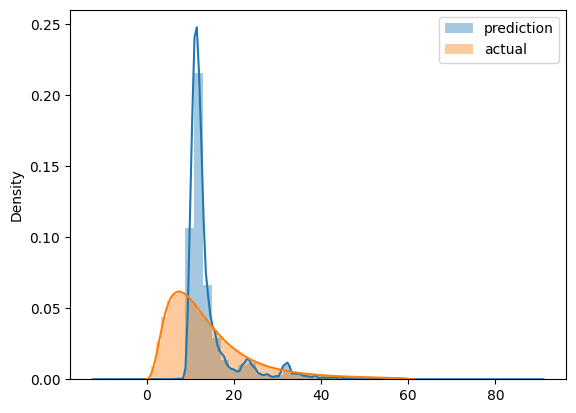

In [76]:
sns.distplot(y_val_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()